In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, log_loss, hinge_loss, matthews_corrcoef
from sklearn.externals import joblib

%matplotlib inline

# Load dataset used for training the model

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plot a sample of the loaded dataset

In [4]:
def plotNum(ind):
    plt.imshow(np.reshape(np.array(data.iloc[ind,1:]), (28, 28)), cmap="gray")

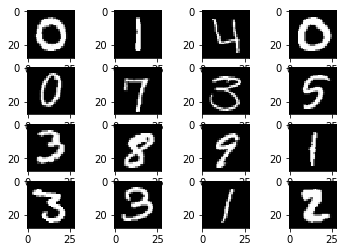

In [5]:
plt.figure()
for ii in range(1,17):
    plt.subplot(4,4,ii)
    plotNum(ii)

# Model Training

In [6]:
X = data.iloc[:, 1:].values
y = data['label'].values

## Split Train/Test

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Create the RandomForest classifier

In [8]:
rfc = RandomForestClassifier(n_jobs=-1, max_depth=X_train.shape[1])

## Specify hyperparameters

In [9]:
parameters = {'n_estimators':(10, 50, 100)}

## Run grid search cross-validation

In [10]:
clf = GridSearchCV(rfc, parameters, cv=5, scoring='f1_micro', return_train_score=False, verbose=2)

In [11]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................................. n_estimators=10, total=   2.7s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   1.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   1.9s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   2.6s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.2s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.3s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.3s
[CV] n_estimators=50 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   52.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=784, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': (10, 50, 100)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=False, scoring='f1_micro', verbose=2)

## Print out the results

In [12]:
clf.cv_results_

{'mean_fit_time': array([2.01024008, 3.13508148, 4.9534317 ]),
 'std_fit_time': array([0.38609033, 0.04030241, 0.16224023]),
 'mean_score_time': array([0.15019541, 0.11796374, 0.12042289]),
 'std_score_time': array([0.06115789, 0.00178263, 0.00204182]),
 'param_n_estimators': masked_array(data=[10, 50, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 50}, {'n_estimators': 100}],
 'split0_test_score': array([0.92703046, 0.95621827, 0.96129442]),
 'split1_test_score': array([0.93320641, 0.95589402, 0.95652864]),
 'split2_test_score': array([0.93539683, 0.95968254, 0.96365079]),
 'split3_test_score': array([0.9312371 , 0.95823408, 0.96188661]),
 'split4_test_score': array([0.93583227, 0.96124524, 0.96060991]),
 'mean_test_score': array([0.93253968, 0.95825397, 0.96079365]),
 'std_test_score': array([0.00320964, 0.00203479, 0.0023597 ]),
 'rank_test_score': array([3, 2, 1], dtype=int32)}

# Model Evaluation

## Compute predictions on the held-out portion of the dataset

In [13]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

## Balanced Accuracy

In [15]:
print("Balanced Accuracy: {:.3f}".format(balanced_accuracy_score(y_test, y_pred)))

Balanced Accuracy: 0.964


## F1 score (micro-averaged)

In [16]:
print("F1 score (micro-averaged): {:.3f}".format(f1_score(y_test, y_pred, average='micro')))

F1 score (micro-averaged): 0.964


## F1 score (macro-averaged)

In [17]:
print("F1 score (macro-averaged): {:.3f}".format(f1_score(y_test, y_pred, average='macro')))

F1 score (macro-averaged): 0.964


## Log Loss

In [19]:
print("Log Loss: {:.3f}".format(log_loss(y_test, y_pred_proba)))

Log Loss: 0.297


## Hinge Loss

In [20]:
print("Hinge Loss: {:.3f}".format(hinge_loss(y_test, y_pred_proba)))

Hinge Loss: 0.298


## Matthews Correlation Coefficient

In [21]:
print("Matthews Correlation Coefficient: {:.3f}".format(matthews_corrcoef(y_test, y_pred)))

Matthews Correlation Coefficient: 0.960


## Confusion Matrix

In [22]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[1013    0    0    1    1    1    3    1    5    0]
 [   0 1139    2    1    1    1    2    0    0    0]
 [   5    3 1036    4    9    0    4    5    5    1]
 [   4    2   10 1083    2   12    0   14   12   12]
 [   2    0    1    0  990    0    7    3    1   20]
 [   2    0    3   12    1  855    9    2    6    8]
 [   6    2    1    0    2    6  986    0    7    0]
 [   1    7   14    3    5    0    0 1080    2   23]
 [   1    7    2    8    6    6    5    2  962    6]
 [   5    3    2   18   11    1    2    6    6  980]]
Normalized confusion matrix
[[9.88e-01 0.00e+00 0.00e+00 9.76e-04 9.76e-04 9.76e-04 2.93e-03 9.76e-04
  4.88e-03 0.00e+00]
 [0.00e+00 9.94e-01 1.75e-03 8.73e-04 8.73e-04 8.73e-04 1.75e-03 0.00e+00
  0.00e+00 0.00e+00]
 [4.66e-03 2.80e-03 9.66e-01 3.73e-03 8.40e-03 0.00e+00 3.73e-03 4.66e-03
  4.66e-03 9.33e-04]
 [3.48e-03 1.74e-03 8.69e-03 9.41e-01 1.74e-03 1.04e-02 0.00e+00 1.22e-02
  1.04e-02 1.04e-02]
 [1.95e-03 0.00e+00 9

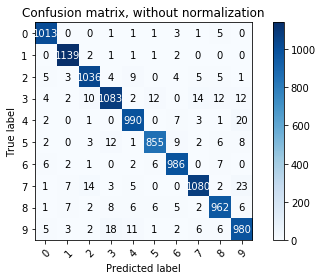

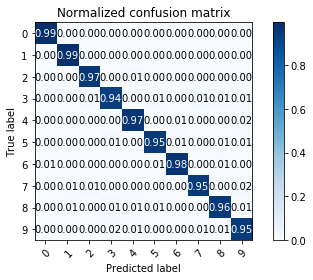

In [23]:
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
_ = plot_confusion_matrix(y_test, y_pred, classes=range(10),
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
_ = plot_confusion_matrix(y_test, y_pred, classes=range(10), normalize=True,
                      title='Normalized confusion matrix')


# Save the best model

In [25]:
joblib.dump(clf, "RF_best.model")

['RF_best.model']